#The fonts for each images that were used for the analysis are:
1 Segoe Print 

2 ScriptS

3 Simplex

4 SITKA Banner

5 Snap ITC

6 Edwardian Script ITC Semi-Expanded

7 Curlz MT

8 Corbel Light

9 Bradley Hand ITC

10 Algerian Extra-Condensed

11 Bauhaus 93,

12 Blackadder ITC

13 Chiller Semi-Expanded

14 Freestyle Script

15 Gigi

16 Harrington

17 Ink Free

18 Kristen ITC Semi-Expanded

19 Mistral

20 Sans-Serif

Fonts were chosen based on how different they were from each other and how closely they appeared to be handwritten

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract as pt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
#importing the necessary modules
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

1


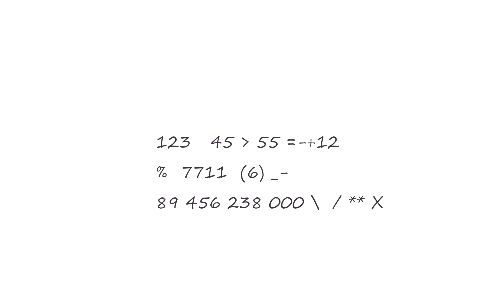

4


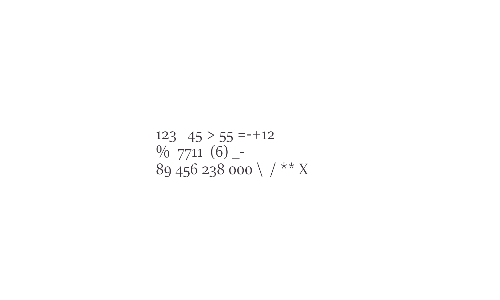

7


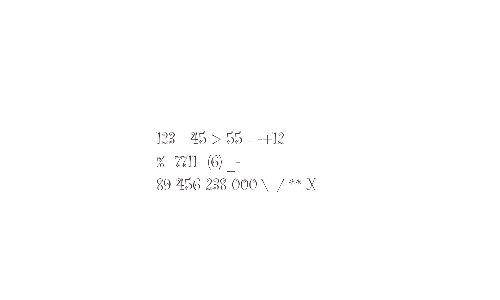

10


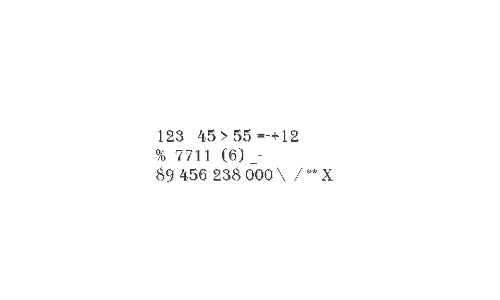

13


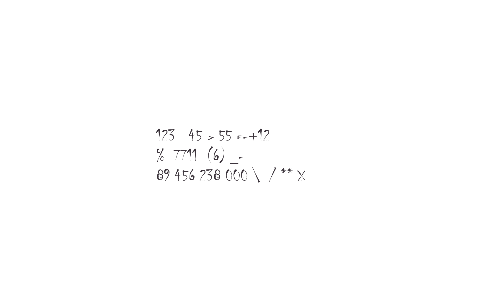

16


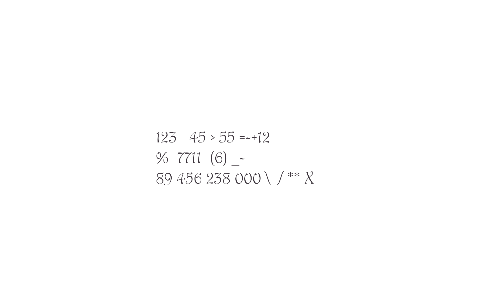

19


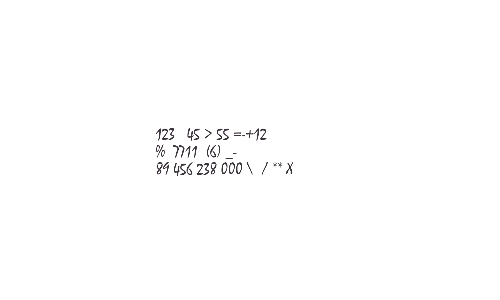

In [93]:
#viewing some images used to analyse tesseract by using the 'step' parameter in 'range' function
for i in range(1,21,3):
  print(i)
  img=cv2.imread(f"/content/{i}.png")
  #resizing the images so its easier to see them
  img=cv2.resize(img,(500,300))
  cv2_imshow(img)

In [94]:
#text extraced from images
for i in range(1,21):
  img=cv2.imread(f"/content/{i}.png")
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  print(pt.image_to_string(img,config="--psm 6"))

123 45> 55 =-+12
% T7121 (6)_-
89 456 238 OOO\ /** X

123 4§ > §§ =-4+172
% 7714 (6) _-
59 456 288 000 \ / KK DS

123 45 > 55 =-412
% 7711 (6) _-
89 456 238°000 \ / ** xX

123 45 >55 =-+12
% 7711 (6) _-
89 456 238 000 \ / ** X

123 45>55 =-+12
% T11 (6) -
9 456 238 @@00 \ /** X

[23 AO => OO = Ft 12
“771 (0) _-
SI 450 238 OOO / ™ oO

123 45> 55 =412
% Tell (6) -
89 456 238 O0O\ /* X

123 45>55 =-+12
% 7711 (6) _-
89 456 238 000 \ /** X

123 45> 55 =-+12
fo 7711 (6) _-
89 456 238 00OO\ /** X

% 7711 (6) -
89 456 238 000\ /** xX

123 45>55 =-+12
% TTL (6) _-
89 156 238 000 \ / ** X

123 46> 66 =-F12
L rn (6) _-
89 456 238 O00 \J**X

1275, 45 +55 =-412
% 77M (6) _-
89 456 238 000 \ /**X

123 45 > 56 =-+12
% 77717 (6) _-
89 456 238 000 \ / **X

123 45>55 =-+12
% 7711 (6) _-
89 456 238 000 \ / ** %

125 45 > 55 =-+12
% 71 (6) _-
89 456 238 OOO \ /** X

123 45>55=412
“lo F411 (@) _-
69 45¢ 236 000 \ /** x

123 45 > 55 =-+12
% 7711 (6) _
89 456 238 000 \ / ** X

123 US >SS =

In [165]:
#checks text extracted from image with the correct text
correct="12345>55=-+12%7711(6)_-89456238000\/**X"
correctSymbols=">=-+%()_-\/**X"
fullcheck=[]
symbols=[]
equalsto=[]
minus=[]
plus=[]
multiplication=[]
division=[]
percentage=[]
greaterThan=[]
for i in range(1,21):
  img=cv2.imread(f"/content/{i}.png")
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  current=pt.image_to_string(img,config="--psm 6 ").strip().replace("\n","").upper().replace(" ","")
  #adds 0 if the extracted text as a whole doesnt match , and 1 if it does
  if current==correct:
    fullcheck.append(1)
  else:
    fullcheck.append(0)
  current=pt.image_to_string(img,config="--psm 6 ").replace(" ","").strip().upper()
  current=re.sub("[A-WY-Za-wy-z0-9]+","",current).split("\n")
  try:
    #adds 0 if all the mathematical symbols from the  extracted text as a whole doesnt match , and 1 if it does
    if "".join(current)==correctSymbols:
      symbols.append(1)
    else:
      symbols.append(0)
    #adds 0 if all the mathematical equals to symbol from the  extracted text  doesnt match , and 1 if it does
    if current[0].count("=")==1 :
      equalsto.append(1)
    else:
      equalsto.append(0)
    #adds 0 if all the mathematical minus symbol from the  extracted text  doesnt match , and 1 if it does
    if current[0].count("-")==1 and  current[1].count("-")==1:
      minus.append(1)
    else:
      minus.append(0)
    #adds 0 if all the mathematical plus symbol from the  extracted text  doesnt match , and 1 if it does
    if current[0].count("+")==1:
      plus.append(1)
    else:
      plus.append(0)
    #adds 0 if all the mathematical multiplication symbol from the  extracted text  doesnt match , and 1 if it does
    if current[2].count("*")==2 and current[2].count("X")==1:
      multiplication.append(1)
    else:
      multiplication.append(0)
    #adds 0 if all the mathematical division symbol from the  extracted text  doesnt match , and 1 if it does
    if current[2].count("/")==1 and current[2].count("\\")==1 :
      division.append(1)
    else:
      division.append(0)
    if current[1].count("%")==1 :
      percentage.append(1)
    else:
      percentage.append(0)
    if current[0].count(">")==1:
      greaterThan.append(1)
    else:
      greaterThan.append(0)
  except:
    continue

In [96]:
#checks text extracted from image with the correct text
correctNumbers="1234555127711689456238000"
allnums=[]
ones=[]
twos=[]
threes=[]
fours=[]
fives=[]
sixs=[]
sevens=[]
eights=[]
nines=[]
zeros=[]
for i in range(1,21):
  img=cv2.imread(f"/content/{i}.png")
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  current=pt.image_to_string(img,config="--psm 6 ").replace(" ","").strip()
  current=re.sub("[^0-9\n]+","",current).split("\n")
  #adds 0 if the extracted text as a whole doesnt match , and 1 if it does
  try:
    if "".join(current)==correctNumbers:
      allnums.append(1)
    else:
      allnums.append(0)
    if current[0].count('1')==2 and current[1].count('1')==2:
      ones.append(1)
    else:
      ones.append(0)
    if current[0].count('2')==2 and current[2].count('2')==1:
      twos.append(1)
    else:
      twos.append(0)
    if current[0].count('3')==1 and current[2].count('3')==1:
      threes.append(1)
    else:
      threes.append(0)
    if current[0].count('4')==1 and current[2].count('4')==1:
      fours.append(1)
    else:
      fours.append(0)
    if current[0].count('5')==3 and current[2].count('5')==1:
      fives.append(1)
    else:
      fives.append(0)
    if current[1].count('6')==1 and current[2].count('6')==1:
      sixs.append(1)
    else:
      sixs.append(0)
    if current[1].count('7')==2:
      sevens.append(1)
    else:
      sevens.append(0)
    if current[2].count('8')==2 :
      eights.append(1)
    else:
      eights.append(0)
    if current[2].count('9')==1:
      nines.append(1)
    else:
      nines.append(0)
    if current[2].count('0')==3:
      zeros.append(1)
    else:
      zeros.append(0)
  except:
    continue
  print(current)

['123455512', '71216', '89456238']
['12344172', '77146', '59456288000']
['1234555412', '77116', '89456238000']
['123455512', '77116', '89456238000']
['123455512', '116', '945623800']
['2312', '7710', '450238']
['1234555412', '6', '894562380']
['123455512', '77116', '89456238000']
['123455512', '77116', '8945623800']
['123455512', '6', '89156238000']
['123466612', '6', '8945623800']
['12754555412', '776', '89456238000']
['123455612', '777176', '89456238000']
['123455512', '77116', '89456238000']
['125455512', '716', '89456238']
['1234555412', '411', '6945236000']
['123455512', '77116', '89456238000']
['12342', '7116', '996232000']
['123455512', '77116', '89456238000']


In [166]:
print(equalsto.count(1),minus.count(1),plus.count(1),multiplication.count(1),division.count(1),percentage.count(1),greaterThan.count(1))

print(symbols)

18 14 14 13 17 15 18
[1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1]


In [98]:
print(allnums.count(1),zeros.count(1),ones.count(1),twos.count(1),threes.count(1),fours.count(1),fives.count(1),sixs.count(1),sevens.count(1),eights.count(1),nines.count(1))
print(allnums)


5 12 10 18 16 11 12 17 10 15 17
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]


#Percent of Times when all symbols were detected correctly:

<Axes: ylabel='Counts'>

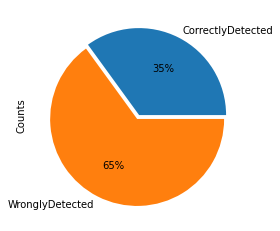

In [169]:
df=pd.DataFrame({"Symbols":["CorrectlyDetected","WronglyDetected"],"Counts":[symbols.count(1),symbols.count(0)]})
df.set_index("Symbols",inplace=True)
df.plot(kind="pie",y="Counts",autopct="%1.0f%%",explode=(0,0.05),legend=False)
#plt.legend(loc="upper left")

#Percent of Times when all numbers were detected correctly:

<Axes: ylabel='Counts'>

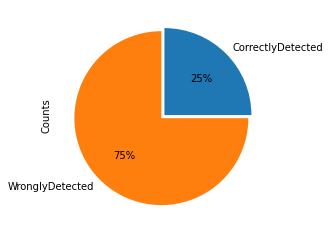

In [170]:
df=pd.DataFrame({"Numbers":["CorrectlyDetected","WronglyDetected"],"Counts":[allnums.count(1),allnums.count(0)]})
df.set_index("Numbers",inplace=True)
df.plot(kind="pie",y="Counts",autopct="%1.0f%%",explode=(0,0.05),legend=False)

#Percent of Times when the whole text was detected correctly


<Axes: ylabel='Counts'>

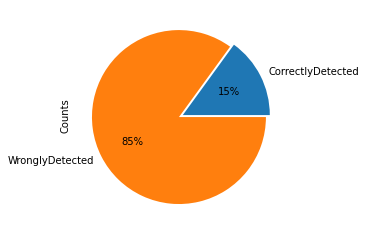

In [171]:
df=pd.DataFrame({"Whole":["CorrectlyDetected","WronglyDetected"],"Counts":[fullcheck.count(1),fullcheck.count(0)]})
df.set_index("Whole",inplace=True)
df.plot(kind="pie",y="Counts",autopct="%1.0f%%",explode=(0,0.05),legend=False)

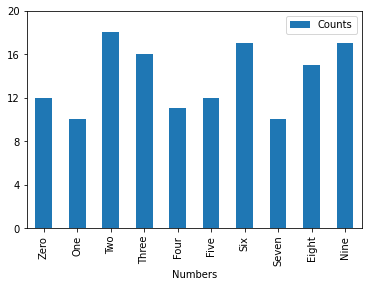

In [167]:
dummyDictionary1={
                  "Numbers":["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"],
                  "Counts":[zeros.count(1),ones.count(1),twos.count(1),threes.count(1),fours.count(1),fives.count(1),sixs.count(1),sevens.count(1),eights.count(1),nines.count(1)]
                  }
df=pd.DataFrame(dummyDictionary1)
df.set_index("Numbers",inplace=True)
ax=df.plot(kind="bar",y=["Counts"],ylim=[0,20],yticks=range(0, 21, 4))
#ax.set_yticklabels(range(0, 21, 2))

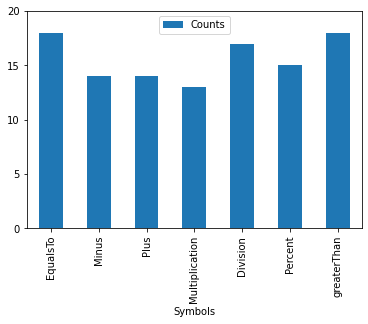

In [168]:
dummyDictionary2={
                  "Symbols":["EqualsTo","Minus","Plus","Multiplication","Division","Percent","greaterThan"],
                  "Counts":[equalsto.count(1),minus.count(1),plus.count(1),multiplication.count(1),division.count(1),percentage.count(1),greaterThan.count(1)]
                  }
df=pd.DataFrame(dummyDictionary2)
df.set_index("Symbols",inplace=True)
ax=df.plot(kind="bar",y=["Counts"],ylim=[0,20],yticks=range(0, 21, 5))

In [87]:
"""#checks text extracted from image with the correct text
correct=">=-+%()_-\/**X"
fullcheck=[]
symbols=[]
equalsto=[]
minus=[]
plus=[]
multiplication=[]
division=[]
percentage=[]
for i in range(1,21):
  img=cv2.imread(f"/content/{i}.png")
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  current=pt.image_to_string(img,config="--psm 6 -c tessedit_char_whitelist=+=-<>/%^*()\\X").strip().replace("\n","").upper().replace(" ","")
  #adds 0 if the extracted text as a whole doesnt match , and 1 if it does
  if current==correct:
    symbols.append(1)
  else:
    symbols.append(0)
  #adds 0 if all the mathematical equals to symbol from the  extracted text  doesnt match , and 1 if it does
  if current[1]==correct[1] :
    equalsto.append(1)
  else:
    equalsto.append(0)
  #adds 0 if all the mathematical minus symbol from the  extracted text  doesnt match , and 1 if it does
  if current[2]==correct[2] and  current[8]==correct[8]:
    minus.append(1)
  else:
    minus.append(0)
  #adds 0 if all the mathematical plus symbol from the  extracted text  doesnt match , and 1 if it does
  if current[3]==correct[3] :
    plus.append(1)
  else:
    plus.append(0)
  #adds 0 if all the mathematical multiplication symbol from the  extracted text  doesnt match , and 1 if it does
  if current[11:]==correct[11:] :
    multiplication.append(1)
  else:
    multiplication.append(0)
  #adds 0 if all the mathematical division symbol from the  extracted text  doesnt match , and 1 if it does
  if current[9:11]==correct[9:11] :
    division.append(1)
  else:
    division.append(0)
  if current[4]==correct[4] :
    percentage.append(1)
  else:
    percentage.append(0)
  print(current)



"""

'#checks text extracted from image with the correct text\ncorrect=">=-+%()_-\\/**X"\nfullcheck=[]\nsymbols=[]\nequalsto=[]\nminus=[]\nplus=[]\nmultiplication=[]\ndivision=[]\npercentage=[]\nfor i in range(1,21):\n  img=cv2.imread(f"/content/{i}.png")\n  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)\n  current=pt.image_to_string(img,config="--psm 6 -c tessedit_char_whitelist=+=-<>/%^*()\\X").strip().replace("\n","").upper().replace(" ","")\n  #adds 0 if the extracted text as a whole doesnt match , and 1 if it does\n  if current==correct:\n    symbols.append(1)\n  else:\n    symbols.append(0)\n  #adds 0 if all the mathematical equals to symbol from the  extracted text  doesnt match , and 1 if it does\n  if current[1]==correct[1] :\n    equalsto.append(1)\n  else:\n    equalsto.append(0)\n  #adds 0 if all the mathematical minus symbol from the  extracted text  doesnt match , and 1 if it does\n  if current[2]==correct[2] and  current[8]==correct[8]:\n    minus.append(1)\n  else:\n    minus.appe

In [86]:
""" if current[0,11,16,17]==correct[0,12,16,17] and current[1,12,28]==correct[1,12,28]:
    allnums.append(1)
  else:
    allnums.append(0)
  print(current)"""

' if current[0,11,16,17]==correct[0,12,16,17] and current[1,12,28]==correct[1,12,28]:\n    allnums.append(1)\n  else:\n    allnums.append(0)\n  print(current)'